In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


#### DATASET

In [5]:
# Reading the data

cookies = pd.read_csv(r"C:\Users\LENOVO\Desktop\All-folder\AlgoraProject\ABtesting\cookie_cats.csv")

In [6]:
# check the the data

cookies.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
# Check duplicate

cookies.duplicated(subset = 'userid').sum()

0

In [9]:
# Check data info

cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [49]:
# Statistical Analysis 

cookies['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [32]:
# drop unwanted column 

cookies = cookies.drop('userid', axis = 1)

In [37]:
cookies[cat].nunique()

version        2
retention_1    2
retention_7    2
dtype: int64

In [47]:
# Creating a categorical column list

cate = ['version', 'retention_1', 'retention_7']

In [48]:
# checking the categorical variables for the categorical columns 

for cat in cookies[cate]:
    print(cat.upper(), ':', cookies[cat].unique())

VERSION : ['gate_30' 'gate_40']
RETENTION_1 : [False  True]
RETENTION_7 : [False  True]


#### Univariate analysis


Univariate analysis is a statistical method used to analyze the relationship between one variable and its distribution within a dataset. It involves examining the characteristics and properties of a single variable without considering any relationship with other variables.

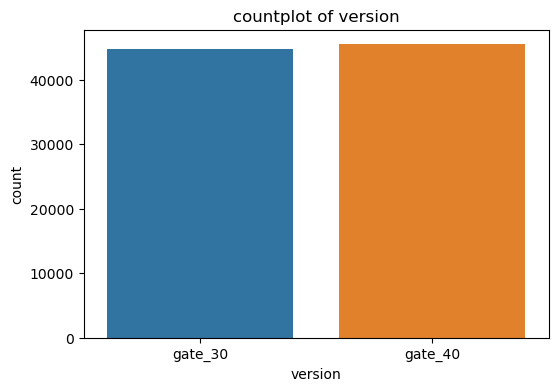

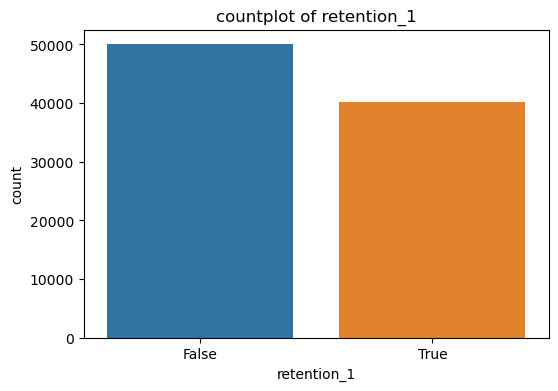

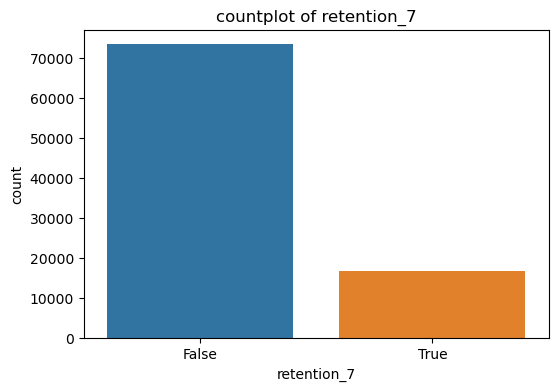

In [64]:
# creating a loop to view the categorical columns 

for col in cate:
    plt.figure(figsize = (6, 4))
    sns.countplot(x = col, data = cookies)
    plt.title(f'countplot of {col}')

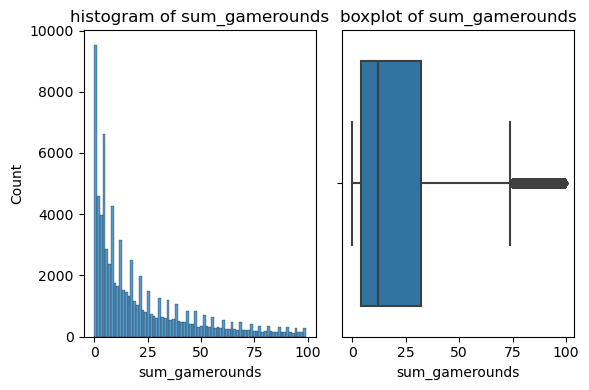

In [69]:
variable = 'sum_gamerounds'

plt.figure(figsize = (6, 4))

plt.subplot(1, 2, 1)
sns.histplot(x = variable , data = cookies[cookies['sum_gamerounds'] < 100])
plt.title(f'histogram of {variable}')


plt.subplot(1, 2, 2)
sns.boxplot(x = variable , data = cookies[cookies['sum_gamerounds'] < 100])
plt.title(f'boxplot of {variable}')

plt.tight_layout()

(89764, 4)
637.0250293558043


sum_gamerounds    Axes(0.125,0.11;0.775x0.77)
dtype: object

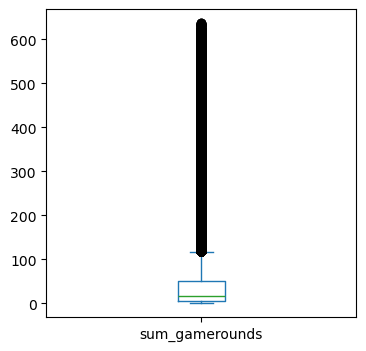

In [79]:
#Remove outliers

upper_limit = (cookies['sum_gamerounds'].mean()) + (3 * cookies['sum_gamerounds'].std())

data = cookies[cookies['sum_gamerounds'] < upper_limit]
print(data.shape)
print(upper_limit)

data['sum_gamerounds'].plot(
    kind = 'box',
    figsize = (4,4),
    subplots = True)

### Bivariance analysis

"Bivariate analysis" refers to the statistical analysis that involves the simultaneous analysis of two variables to determine the relationship between them.

In [80]:
cookies.columns

Index(['version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

retention_1  False  True 
version                  
gate_30      24666  20034
gate_40      25370  20119

           %Retention
retention_1      False      True 
version                          
gate_30      27.349233  22.213352
gate_40      28.129816  22.307598




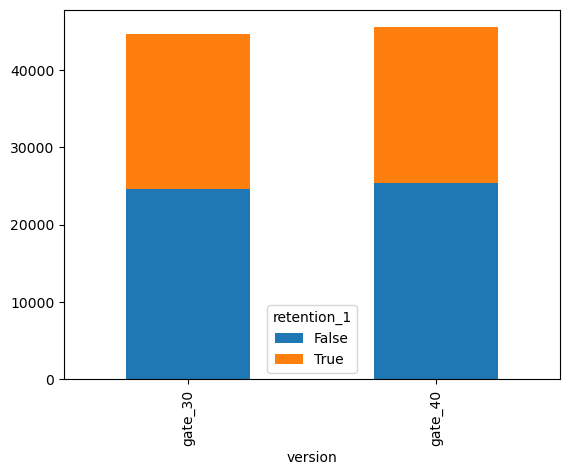

In [160]:
# retention1 at different gate 

gate_retention1 = pd.crosstab(cookies['version'], cookies['retention_1'])

print(gate_retention1)
print("\n           %Retention")
print(gate_retention1 / len(cookies) * 100)
print("\n")
gate_retention1.plot.bar(stacked = True);

retention_7  False  True 
version                  
gate_30      36198   8502
gate_40      37210   8279

           %Retention
retention_7      False     True 
version                         
gate_30      40.135715  9.426870
gate_40      41.257803  9.179612




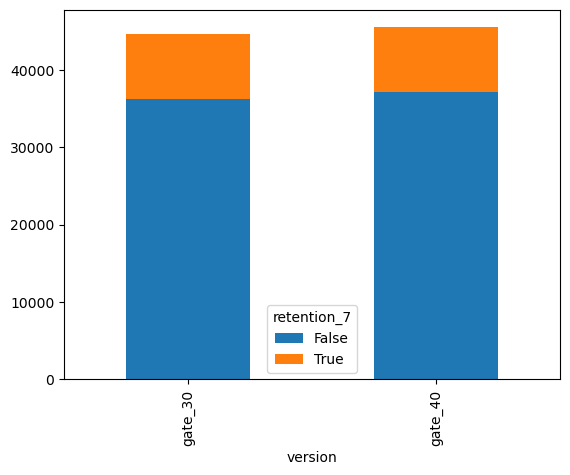

In [161]:
# retention 7 at different gate

gate_retention7 = pd.crosstab(cookies['version'], cookies['retention_7'])

print(gate_retention7)
print("\n           %Retention")
print(gate_retention7 / len(cookies) * 100)
print("\n")
gate_retention7.plot.bar(stacked = True);

version
gate_30    20034
gate_40    20119
Name: sum_gamerounds, dtype: int64
 


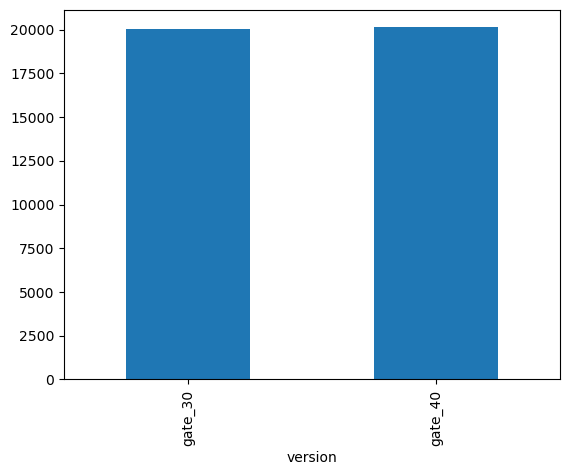

In [181]:
# total rounds of game for different gates for retention 1

retention1_sum_gamerounds = cookies[cookies['retention_1'] == True].drop('retention_7', axis = 1).groupby('version')['sum_gamerounds'].count()

print(retention1_sum_gamerounds)
print(' ')
retention1_sum_gamerounds.plot.bar();

version
gate_30    8502
gate_40    8279
Name: sum_gamerounds, dtype: int64
 


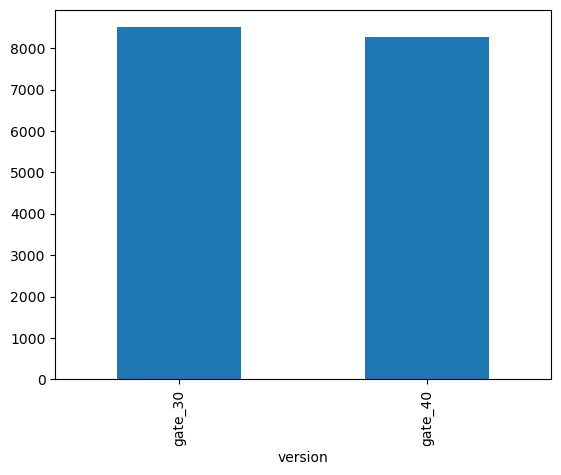

In [180]:
# total rounds of game for different gates for retention 7

retention7_sum_gamerounds = cookies[cookies['retention_7'] == True].drop('retention_1', axis = 1).groupby('version')['sum_gamerounds'].count()

print(retention7_sum_gamerounds)
print(' ')
retention7_sum_gamerounds.plot.bar();


- 55 percent of the players didn't play the game 1 day after insalling
- 81 percent of the players didn't play the game 7 day after insalling

In [178]:
cookies.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std    max
version retention_1                                             
gate_30 False        24666     6.0  18.379591  319.423232  49854
        True         20034    48.0  94.411700  135.037697   2961
gate_40 False        25370     6.0  16.340402   35.925756   1241
        True         20119    49.0  95.381182  137.887256   2640

In [179]:
cookies.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std    max
version retention_7                                              
gate_30 False        36198    11.0   25.796508   43.316158    981
        True          8502   105.0  165.962479  568.000576  49854
gate_40 False        37210    11.0   25.856356   44.406112   2640
        True          8279   111.0  165.649837  183.792499   2294

In [182]:
# A/B Groups & Target Summary Stats
cookies.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


#### Statistical Analysis

Chi-Square Test: Chi-square test is used to determine whether there is a significant association between two categorical variables.

In [175]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in cookies.columns:
    if variable != 'version':
        contingency_table = pd.crosstab(cookies[variable], cookies['version'])

        chi2, P_value, Degrees, frequencies = chi2_contingency(contingency_table)

        print(f"\nChi_squared test for {variable} vs version")
        print(f"Chi_sqaured value: {chi2}")
        print(f"P_value: {P_value}")

        if P_value < alpha:
            print(f"The versions across {variable} is statistically significant")
        else:
            print(f"There is no significant difference in versions across {variable}")


Chi_squared test for sum_gamerounds vs version
Chi_sqaured value: 985.4980544212584
P_value: 0.1526113569373539
There is no significant difference in version across sum_gamerounds

Chi_squared test for retention_1 vs version
Chi_sqaured value: 3.1591007878782262
P_value: 0.07550476210309086
There is no significant difference in version across retention_1

Chi_squared test for retention_7 vs version
Chi_sqaured value: 9.959086799559167
P_value: 0.0016005742679058301
The versions across retention_7 is statistically significant


##### Conclusion from the chi2 table 


1. This means that, based on the data and the statistical analysis performed, we do not have sufficient evidence to conclude that there is a significant association between the version of the game and the number of gamerounds played. Therefore, we cannot make any claims about the influence of the game version on the number of gamerounds played based on this analysis.


2. This means that, based on the data and the statistical analysis performed, we do not have sufficient evidence to conclude that there is a significant association between the version of the game and retention after one day. Therefore, we cannot make any claims about the influence of the game version on retention after one day based on this analysis.


3. This means that, based on the data and the statistical analysis performed, we have sufficient evidence to conclude that there is a significant association between the version of the game and retention after seven days. Therefore, we can infer that the game version may have a statistically significant impact on retention after seven days.

In [207]:
# Check the normality of the data

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu 

# Step 1: Ckeck Assumptions
# Normality Assumption

shapiro_stat_gate_30, shapiro_p_value_gate_30 = shapiro(cookies[cookies['version'] == 'gate_30']['sum_gamerounds'])
shapiro_stat_gate_40, shapiro_p_value_gate_40 = shapiro(cookies[cookies['version'] == 'gate_40']['sum_gamerounds'])

print(f'shapiro-wilk test for normality (gate_30): p-value = {shapiro_p_value_gate_30}')
print(f'shapiro-wilk test for normality (gate_40): p-value = {shapiro_p_value_gate_40}')

if shapiro_p_value_gate_30 < alpha:
    print(f'\nGate_30 Normality: {shapiro_p_value_gate_30}, We reject the null hypothesis, gate_30 is not normally distrubited')
else:
    print(f'Gate_30 Normality: {shapiro_p_value_gate_30}, We fail to reject the null hypothesis, gate_30 is normally distrubited')
    
if shapiro_p_value_gate_40 < alpha:
    print(f'Gate_40 Normality: {shapiro_p_value_gate_40}, We reject the null hypothesis, gate_40 is not normally distrubited')
else:
    print(f'Gate_40 Normality: {shapiro_p_value_gate_40}, We fail to reject the null hypothesis, gate_40 is normally distrubited')

# Equality of variances assumption

levene_stat, levene_p_value = levene(cookies[cookies['version'] == 'gate_30']['sum_gamerounds'], cookies[cookies['version'] == 'gate_40']['sum_gamerounds'])
                                     
print(f"\nLevene's test for equality of varaiance: p-value = {levene_p_value}")

if levene_p_value < alpha:
    print(f"\nLevene's test: {levene_p_value}, We reject the null hypothesis, There is significant difference bewteen Gate_30 and Gate_40")
else:
    print(f"\nLevene's test: {levene_p_value}, We fail to reject the null hypothesis, There is no significant difference in variance between the Gate_30 and Gate_40")

shapiro-wilk test for normality (gate_30): p-value = 0.0
shapiro-wilk test for normality (gate_40): p-value = 0.0

Gate_30 Normality: 0.0, We reject the null hypothesis, gate_30 is not normally distrubited
Gate_40 Normality: 0.0, We reject the null hypothesis, gate_40 is not normally distrubited

Levene's test for equality of varaiance: p-value = 0.46694516772623273

Levene's test: 0.46694516772623273, We fail to reject the null hypothesis, There is no significant difference in variance between the Gate_30 and Gate_40


In [201]:
# Step 2: Perform a suitable test

alpha = 0.05

if shapiro_p_value_gate_30 > alpha and shapiro_p_value_gate_40 > alpha and levene_p_value > alpha:
    # Assumption met - use t-test for means
    t_stat, t_p_value = ttest_ind(cookies[cookies['version'] == 'gate_30']['sum_gamerounds'], cookies[cookies['version'] == 'gate_40']['sum_gamerounds'])
    print(f'\nindependent two-sample t-test: p-value = {t_p_value}')
else:
    # Assumptions not met - use Mann_whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(cookies[cookies['version'] == 'gate_30']['sum_gamerounds'], cookies[cookies['version'] == 'gate_40']['sum_gamerounds'])
    print(f'\nMann-whitneyu test: p-value = {u_p_value}')


Mann-whitneyu test: p-value = 0.05020880772044255


#### Conclusion

- The Mann-whitneyu p-value is higher than the alpha which means, we fail to reject the null hypothesis. 
- We conclude that there is not enough evidence to claim a significant difference between the distributions of Gate_30 and Gate_40.